In [1]:
include("intro.jl")

using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using HNProcess
using DataRefine
using PartitioningData

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!



[ Info: Precompiling HNProcess [top-level] (cache misses: include_dependency fsize change (2))


In [22]:

#=
template = [
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
]
=#

i1 = [
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
    1 1 1 1 1 1 1 1;
]

i2 = [
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
]

i3 = [
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    -1 -1 -1 -1 1 1 1 1;
    1 1 1 1 -1 -1 -1 -1;
    1 1 1 1 -1 -1 -1 -1;
    1 1 1 1 -1 -1 -1 -1;
    1 1 1 1 -1 -1 -1 -1;
]

i4 = [
    1 1 -1 -1 1 1 -1 -1;
    1 1 -1 -1 1 1 -1 -1;
    1 1 -1 -1 1 1 -1 -1;
    1 1 -1 -1 1 1 -1 -1;
    -1 -1 1 1 -1 -1 1 1;
    -1 -1 1 1 -1 -1 1 1;
    -1 -1 1 1 -1 -1 1 1;
    -1 -1 1 1 -1 -1 1 1;
]

images = Dict(
    "i1"  => [
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
        1 1 1 1 1 1 1 1;
    ],
    
    "i2" => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
    ],
    
    "i3"  => [
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        -1 -1 -1 -1 1 1 1 1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
        1 1 1 1 -1 -1 -1 -1;
    ],
    
    "i4" => [
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        1 1 -1 -1 1 1 -1 -1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
        -1 -1 1 1 -1 -1 1 1;
    ]
)

Dict{String, Matrix{Int64}} with 4 entries:
  "i4" => [1 1 … -1 -1; 1 1 … -1 -1; … ; -1 -1 … 1 1; -1 -1 … 1 1]
  "i3" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; 1 1 … -1 -1; 1 1 … -1 -1]
  "i1" => [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1]
  "i2" => [-1 -1 … 1 1; -1 -1 … 1 1; … ; -1 -1 … 1 1; -1 -1 … 1 1]

In [23]:
println(keys(images))
dot_products = []
p = [i for i in keys(images)]
ims = [images[i] for i in keys(images)]
for i in range(1,length(ims) - 1)
    for k in range(i+1,length(ims))
        println(p[i])
        println(p[k])
        push!(dot_products, dot(vec(ims[i]),vec(ims[k])))
    end
end
dot_products

["i4", "i3", "i1", "i2"]
i4
i3
i4
i1
i4
i2
i3
i1
i3
i2
i1
i2


6-element Vector{Any}:
 0
 0
 0
 0
 0
 0

In [121]:
sim_time = 1
steps = 500
parameters = Dict{String, Any}(
    "images" => [i1,i2,i3,i4],
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)

Dict{String, Any} with 8 entries:
  "images"          => [[1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1], [-1 -…
  "scaling"         => 1.0
  "iterations"      => 100
  "steps"           => 500
  "num_agitations"  => 1
  "initial_stimuli" => [(1, 1, 1)]
  "sim_time"        => 1
  "delta"           => -0.002

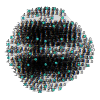

In [122]:
# Graph Checker
graph = get_HN_graph(parameters["images"],-1.0)

elabels = [weights(graph)[e.src, e.dst] for e in edges(graph)]

# Plot with edge labels
gplot(graph, 
      nodelabel=1:nv(graph), 
      edgelabel=round.(elabels, digits=2),)

In [123]:
res = HN_Solver_Traj(parameters, true)
save_trajectories(res[2], "8by8","len4_t2")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
File 8by8_1_len4_t2.dat is generated


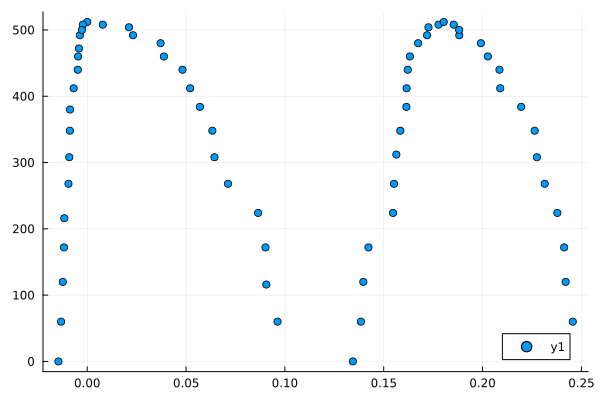

In [124]:
HN_cut_plotter(parameters, res[1])

In [125]:

rots = iterative_rotater_state(res[1], parameters);
for st in rots
    if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
        -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
        println("FOUND")
        pretty_table(reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))
    end
end

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

In [126]:
sol_finder(res[1],parameters)

FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
│     -1 │     -1 │     -1 │     -1 │      1 │      1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
FOUND
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3

2-element Vector{Any}:
 (Int8[1, 1, 1, 1, -1, -1, -1, -1, 1, 1  …  1, 1, -1, -1, -1, -1, 1, 1, 1, 1], [-0.9854282924270259, -0.9942231042645826, -0.9900346614057587, -0.9902188439085338, -0.9284163739414448, -0.987597672200164, -0.9896324217916446, -0.898963850440381, -0.889156691807159, -1.0  …  -0.9891334344911566, -0.9466371598911918, -0.8948082390657754, -0.988130619721221, -0.921064078627037, -0.9333412981833233, -0.9622750397658595, -0.9372092801631942, -0.9978060171430831, -0.8952451032313209])
 (Int8[-1, -1, -1, -1, 1, 1, 1, 1, -1, -1  …  -1, -1, 1, 1, 1, 1, -1, -1, -1, -1], [0.8656005924682193, 0.8568057806306624, 0.8609942234894867, 0.8608100409867117, 0.9226125109538001, 0.8634312126950814, 0.8613964631036009, 0.952065034454864, 0.9618721930880862, 0.8510288848952454  …  0.8618954504040883, 0.9043917250040536, 0.95622064582947, 0.8628982651740245, 0.9299648062682082, 0.9176875867119221, 0.8887538451293857, 0.913819604732051, 0.8532228677521623, 0.9557837816639243])

In [130]:
r = HN_Solver(parameters)

pretty_table(reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)))

conv = 0
elp = @elapsed begin
    for i in 1:1000
        r = HN_Solver(parameters)
        if (reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
│      1 │      1 │      1 │      1 │     -1 │     -1 │     -1 │     -1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
934
took 12.5037655 seconds


In [129]:
r = HN_og(parameters)

pretty_table(reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)))
conv = 0
elp = @elapsed begin
    for i in 1:1000
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            conv +=1 
        end
    end
end
println(conv)
println("took $elp seconds")

┌────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│      1 │      1 │     -1 │     -1 │      1 │      1 │     -1 │     -1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
│     -1 │     -1 │      1 │      1 │     -1 │     -1 │      1 │      1 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘
523
took 18.856001292 seconds
